# Capstone Project - Linear Regression 

This is data prep for Linear Regression capstone poject, done during *2021 Python for Machine Learning & Data Science Masterclass* course from udemy- link below:

https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass/

----
## Overview
ssss

----
## Goal:
**sssss**

----
## Parts of project:
1. Understanding the background and data.
2. Exploring SalePrice (target).
3. Exploring dependent variables.
4. Data preprocessing and feature engineering.
5. Assumptions for testing.
6. Modeling

----
----

**Loading the file with description**

In [1]:
with open('data/Ames_Housing_Feature_Description.txt','r') as f: 
    info = f.read()
    print(info)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Import libs, data quick description

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

sns.set_style('darkgrid')
# color for plots
color='darkslateblue'

In [3]:
# load dataset
AmesDf = pd.read_csv("data/AmesDf.csv")

# 4. Data preprocessing and feature engineering.

As we looked onto some outliers (also they were mentioned in the original papers describing dataset)

### Here we'll take care of:

* missing values, 
* encode some numerical features and create simple new ones,
* checks skewness and transform some columns

## Let's start with missing values.

From decription file, we can notice that NA are used, when for example there is basement, pool or fireplace. That's a big hint in dealing with missing values.

We will also  define simple func, to make it easier

In [4]:
def percent_missing(df):
    percent_nan = round(100* df.isnull().sum() / len(df),4)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

def plot_missing(ser, x=None):
    # barplot of missing values
    plt.figure(figsize=(14,6))
    sns.barplot(x=ser.index,y=ser, palette='viridis')
    plt.ylabel(' Percent of missing values')
    plt.xlabel(' Feature ')
    plt.title(' Missing values in AmesDf shown in %%% ')
    plt.xticks(rotation=90)
    plt.ylim(0,x);

In [5]:
# we create a series for plot
PercentNan = percent_missing(AmesDf)

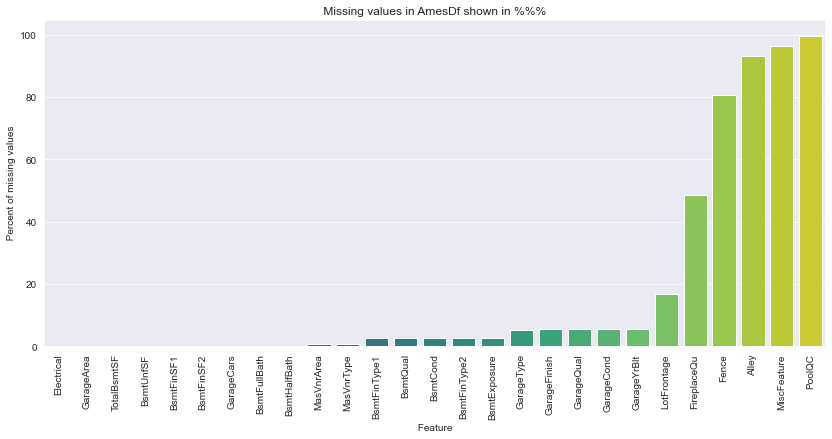

In [6]:
plot_missing(PercentNan)

We see, that some features has quite low percentage of missing values, so it might be a good idea to try to fill them. On the other hand, last 4 features has over 80% of missing data, so we'll consider to drop them.

**Let's start with low % of missing values features.**

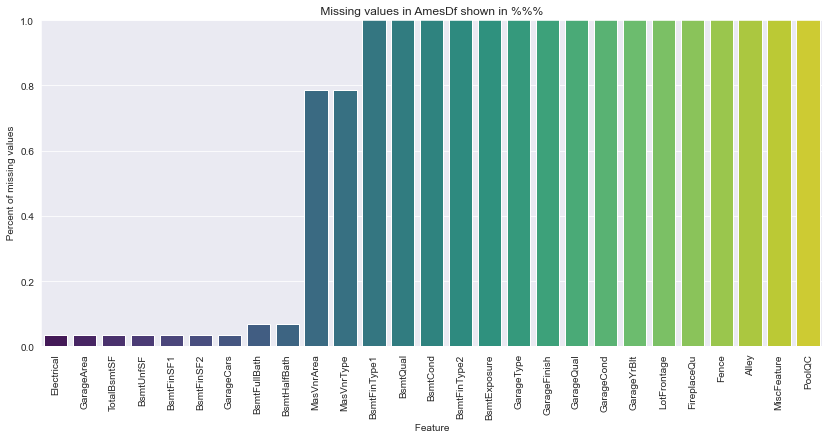

In [7]:
plot_missing(PercentNan, 1)

In [8]:
# features with less missing values then 1%
LessTn1 = PercentNan[PercentNan < 1]
LessTn1
# first 7 features has very few missing values

Electrical      0.0342
GarageArea      0.0342
TotalBsmtSF     0.0342
BsmtUnfSF       0.0342
BsmtFinSF1      0.0342
BsmtFinSF2      0.0342
GarageCars      0.0342
BsmtFullBath    0.0683
BsmtHalfBath    0.0683
MasVnrArea      0.7858
MasVnrType      0.7858
dtype: float64

In [9]:
# 1 row as a percentage of all df
100/len(AmesDf)
# we see that first 7 feats has missing value in 1 row, maybe even the same row

0.0341646737273659

As mentioned earlier, NA means that there is no basement/fireplace etc, so we'll fill them with 0/None depending on the type of data. The missing value in Electrital could be replaced, but i'll drop it (null doesn't mean no electical :) ).

In [10]:
# copy of amesdf
AmesDfNN = AmesDf.copy()

**NULLS < 1%**

In [11]:
LessTn1[LessTn1.index!='Electrical'].index

Index(['GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2',
       'GarageCars', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea',
       'MasVnrType'],
      dtype='object')

In [12]:
# num cols
bsmt_num_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 
                  'BsmtFullBath', 'BsmtHalfBath','GarageArea', 'MasVnrArea']
AmesDfNN[bsmt_num_cols] = AmesDfNN[bsmt_num_cols].fillna(0)

In [13]:
# cat cols
bsmt_str_cols =  ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                  'BsmtFinType2', 'GarageCars','MasVnrType']
AmesDfNN[bsmt_str_cols] = AmesDfNN[bsmt_str_cols].fillna('None')

In [14]:
# Electrical
AmesDfNN = AmesDfNN.dropna(axis=0,subset= ['Electrical'])

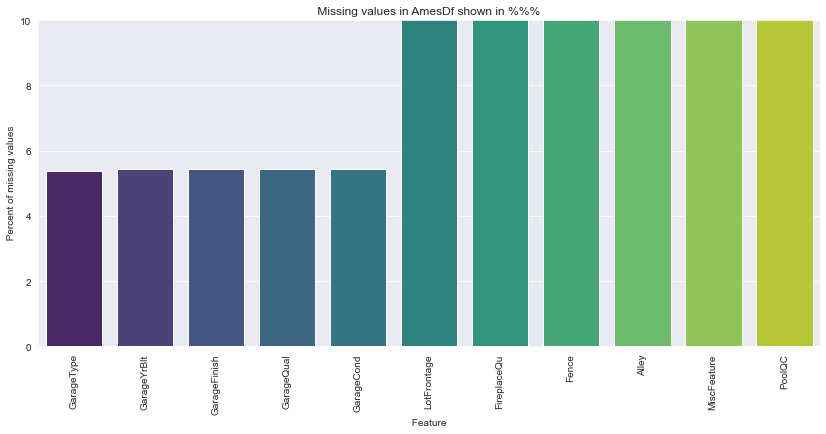

In [15]:
# re-check nulls
PercentNan = percent_missing(AmesDfNN)
plot_missing(PercentNan,10)

**Garage columns**

We fill NA same as earlier, by imputing 0/None.

In [16]:
GrgCols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
AmesDfNN[GrgCols] = AmesDfNN[GrgCols].fillna('None')

In [17]:
AmesDfNN['GarageYrBlt'] = AmesDfNN['GarageYrBlt'].fillna(0)

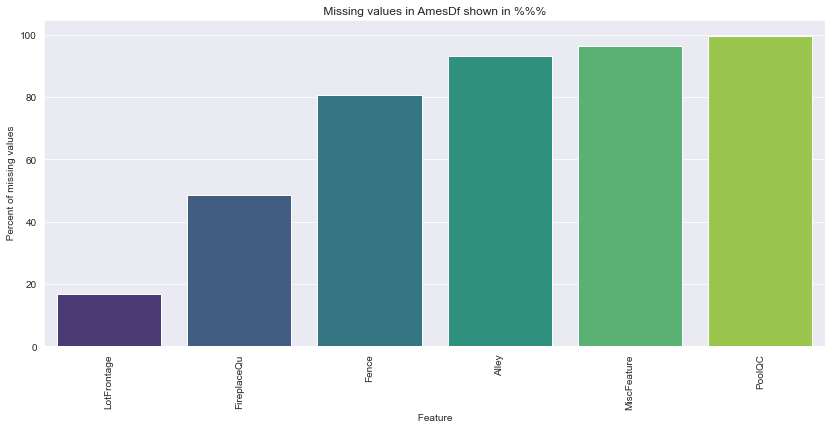

In [18]:
PercentNan = percent_missing(AmesDfNN)
plot_missing(PercentNan)

From description.txt we can read that PoolQC, MiscFeature, Alley and Fence are filled with NA if there is none. We could fill there *None* but we'll drop these colums, as probably they won't be that meaningful for predicting.

In [19]:
AmesDfNN = AmesDfNN.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

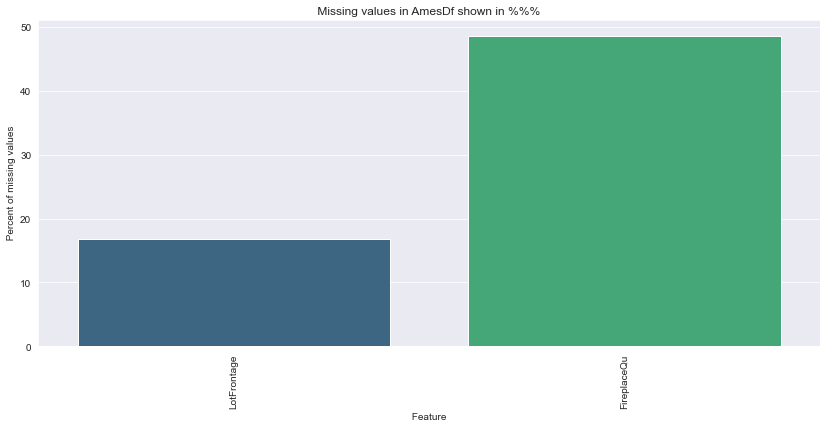

In [20]:
PercentNan = percent_missing(AmesDfNN)
plot_missing(PercentNan)

In [21]:
# fill with none, as in this houses is no Fireplace
AmesDfNN['FireplaceQu'] = AmesDfNN['FireplaceQu'].fillna("None")

**Imputing LotFrontage**

In dealing with missing values in LotFrontage, will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

Neighborhood: Physical locations within Ames city limits.

LotFrontage: Linear feet of street connected to property.



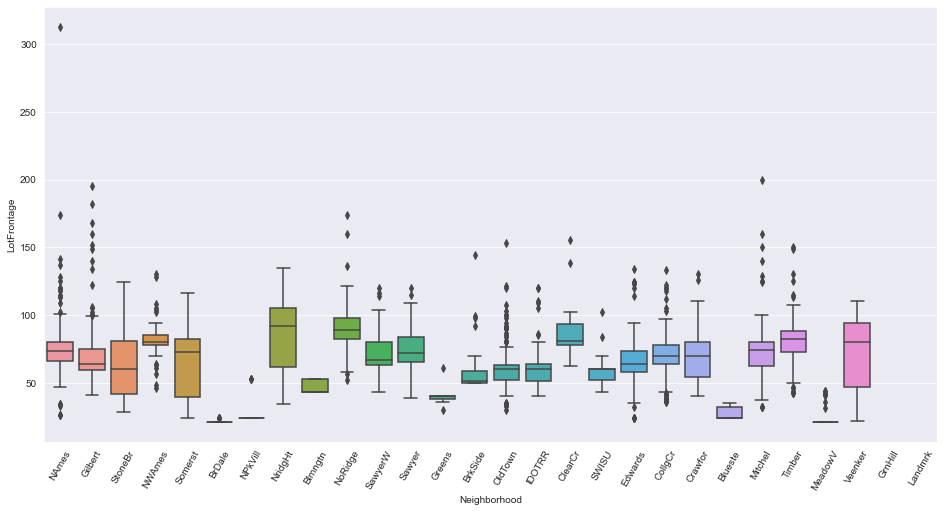

In [22]:
plt.figure(figsize=(16,8))
sns.boxplot(y='LotFrontage',x='Neighborhood',data=AmesDfNN)
plt.xticks(rotation=60);

We will use median of LotFrontage for each Neighborhood to fill the missing values.

In [23]:
# so here we group by Neighborhood, then get LotFrontage, and fill with median
AmesDfNN['LotFrontage'] = AmesDfNN.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [24]:
PercentNan = percent_missing(AmesDfNN)
PercentNan

LotFrontage    0.1025
dtype: float64

In [25]:
# for the rest, that seems to not have Neighborhood, we'll fill with 0
AmesDfNN['LotFrontage'] = AmesDfNN['LotFrontage'].fillna(0)

In [46]:
# No missing values left
percent_missing(AmesDfNN)

Series([], dtype: float64)

## It's time for encode some of numerics and create new features!

At first look at numerical data, to ensure that some numerical features should actually be categorical.

In [27]:
AmesDfPrep = AmesDfNN.copy()

In [28]:
numerical = AmesDfPrep.select_dtypes(include=np.number).columns

In [29]:
with pd.option_context('display.max_columns', None):
    display(AmesDfPrep[numerical].head())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,528.0,210,62,0,0,0,0,0,5,2010,215000
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,730.0,140,0,0,0,120,0,0,6,2010,105000
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,312.0,393,36,0,0,0,0,12500,6,2010,172000
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,522.0,0,0,0,0,0,0,0,4,2010,244000
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,482.0,212,34,0,0,0,0,0,3,2010,189900


MSSubClass, OverallQual, OverallCond, MoSold should be categorical.

In [30]:
cols = ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']
AmesDfPrep[cols] = AmesDfPrep[cols].astype('object')

**Some new simple and basic features:**

In [31]:
# Total Square Footage
AmesDfPrep['TotalSF'] = AmesDfPrep.TotalBsmtSF + AmesDfPrep.GrLivArea
AmesDfPrep['TotalFloorSF'] = AmesDfPrep['1stFlrSF'] + AmesDfPrep['2ndFlrSF']
AmesDfPrep['TotalPorchSF'] = AmesDfPrep.OpenPorchSF + AmesDfPrep.EnclosedPorch + \
                        AmesDfPrep['3SsnPorch'] + AmesDfPrep.ScreenPorch

# Total Bathrooms
AmesDfPrep['TotalBathrooms'] = AmesDfPrep.FullBath + .5 * AmesDfPrep.HalfBath + \
                          AmesDfPrep.BsmtFullBath + .5 * AmesDfPrep.BsmtHalfBath

# Booleans
AmesDfPrep['HasBasement'] = AmesDfPrep.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
AmesDfPrep['HasGarage'] = AmesDfPrep.GarageArea.apply(lambda x: 1 if x > 0 else 0)
AmesDfPrep['HasPorch'] = AmesDfPrep.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
AmesDfPrep['HasPool'] = AmesDfPrep.PoolArea.apply(lambda x: 1 if x > 0 else 0)
AmesDfPrep['WasRemodeled'] = (AmesDfPrep['YearRemod/Add'] != AmesDfPrep.YearBuilt).astype(np.int64)
AmesDfPrep['IsNew'] = (AmesDfPrep.YearBuilt > 2000).astype(np.int64)
AmesDfPrep['WasCompleted'] = (AmesDfPrep.SaleCondition != 'Partial').astype(np.int64)

We can also try to simplify some categorical features.

In [32]:
# Lets create categorical and numerical DF, as it may be useful later
AmesDfNum = AmesDfPrep.select_dtypes(include=np.number)
AmesDfCat = AmesDfPrep.select_dtypes(exclude=np.number)

In [35]:
# check unique classes for cat vars
AmesDfCat.nunique()

MSSubClass       16
MSZoning          7
Street            2
LotShape          4
LandContour       4
Utilities         3
LotConfig         5
LandSlope         3
Neighborhood     28
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
OverallQual      10
OverallCond       9
RoofStyle         6
RoofMatl          7
Exterior1st      16
Exterior2nd      17
MasVnrType        5
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          6
BsmtCond          6
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       5
Functional        8
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageCars        7
GarageQual        6
GarageCond        6
PavedDrive        3
MoSold           12
SaleType         10
SaleCondition     6
dtype: int64

We'll check Neighborhood, Exterior1st and Exterior2nd.

In [36]:
CountNeighbours = AmesDfPrep.groupby('Neighborhood').count()['SalePrice'].sort_values().reset_index()
CountNeighbours.rename(columns={'SalePrice':'Count'}, inplace=True)

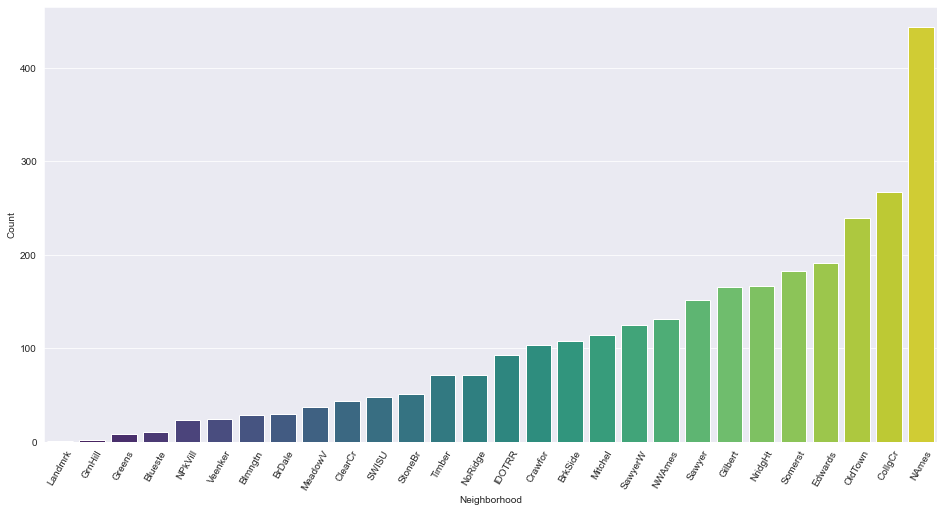

In [37]:
# quick plot to see, which neighborhoods are 'the most popular'
plt.figure(figsize=(16,8))
sns.barplot(data=CountNeighbours, x='Neighborhood', y='Count', palette='viridis')
plt.xticks(rotation=60);

We can clearly see, that NWAmes which stands for Northwest Ames has over 400 houses, while Landmrk has 0.

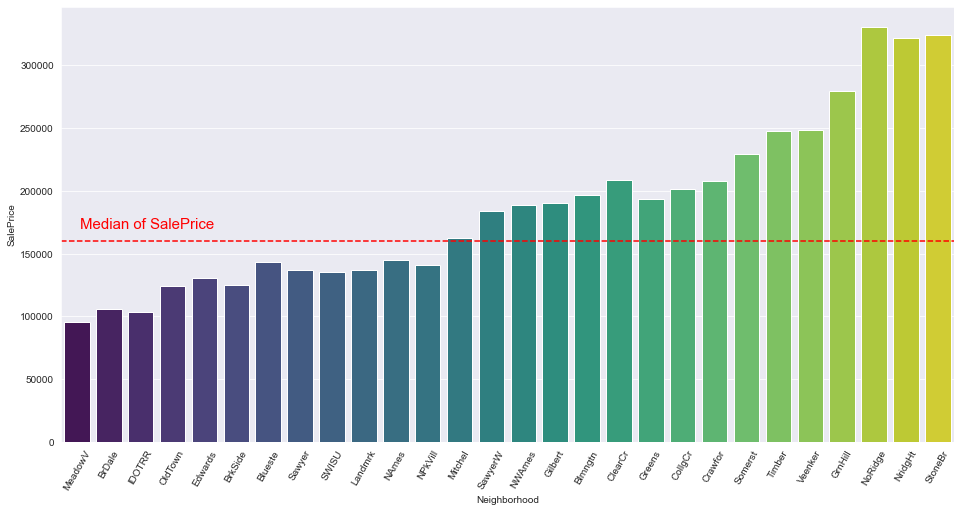

In [48]:
grouped = AmesDfPrep.loc[:,['Neighborhood', 'SalePrice']].groupby(['Neighborhood']).median().sort_values(by='SalePrice')
# plot the SalePrice per Neighborhood
plt.figure(figsize=(16,8))
sns.barplot(x=AmesDfPrep.Neighborhood, y=AmesDfPrep.SalePrice, order=grouped.index, palette='viridis', ci=None)
plt.axhline(y=AmesDfPrep['SalePrice'].median(), ls='--', c='red')
plt.text(y=AmesDfPrep['SalePrice'].median()+10000,x=0.1, s="Median of SalePrice", size=15,c='red')
plt.xticks(rotation=60);

In [43]:
with pd.option_context('display.max_columns', None):
    display(grouped.reset_index().transpose())


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
Neighborhood,MeadowV,BrDale,IDOTRR,OldTown,Edwards,BrkSide,Blueste,Sawyer,SWISU,Landmrk,NAmes,NPkVill,Mitchel,SawyerW,NWAmes,Gilbert,Blmngtn,ClearCr,Greens,CollgCr,Crawfor,Somerst,Timber,Veenker,GrnHill,NoRidge,NridgHt,StoneBr
SalePrice,88250,106000,106500,119900,125000,126750,130500,135000,136200,137000,140000,143750,153500,180000,181000,183000,191500,197500,198000,200000,200624,225500,232500,250250,280000,302000,317750,319000


Here we see, that top3 Neighborhoods has similar median of price (over 300k). 2nd and 3rd ones seems to have close median too. We can bin also Greens,CollgCr and Crawfor.

In [ ]:
# let's check skewness, and select featurea with abs skewness > 0.5
# SkewVars = AmesDfNN[numerical].apply(lambda x: x.skew()).sort_values(ascending=False)
# SkewVars = SkewVars[abs(SkewVars) > 0.5]
# SkewVars
# print(str(SkewVars.shape[0]) + " skewed numerical features to log transform")
# AmesDfPrep[SkewVars.index] = np.log1p(AmesDfPrep[SkewVars.index])

# SkewVarsEdit = AmesDfPrep[numerical].apply(lambda x: x.skew()).sort_values(ascending=False)
# SkewVarsEdit = SkewVarsEdit[abs(SkewVarsEdit) > 0.5]
# SkewVarsEdit

In [100]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

NameError: name 'df_objs' is not defined

In [101]:
# df_ames_num = AmesDfNN.select_dtypes(include=np.number)
# df_ames_cat = AmesDfNN.select_dtypes(exclude=np.number)

# df_ames_cat = pd.get_dummies(df_ames_cat,drop_first=True)

# final_df = pd.concat([df_ames_num,df_ames_cat],axis=1)
# final_df

In [ ]:
Outliars

In [73]:
AmesDf = AmesDf.drop(ind_drop,axis=0)